In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#loading the spotify data
data=pd.read_csv("top50.csv",encoding="latin")

In [4]:
#having a quick look at the structure of the file and some data
print(data.shape)
data.head()

(50, 14)


,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [5]:
#removing the unamed column
data=data.drop(['Unnamed: 0'],axis=1)

In [6]:
#the data has 50 songs described by 13 columns
columns=data.columns
columns

Index(['Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute', 'Energy',
       'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.', 'Length.',
       'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')

In [7]:
#total count of unique artists in top 50 songs
artists=data.groupby("Artist.Name")["Artist.Name"].size().sort_values(ascending=False)
print("no of artists : ",len(artists))
artists

no of artists :  38


Artist.Name
Ed Sheeran          4
The Chainsmokers    2
Ariana Grande       2
Shawn Mendes        2
Sech                2
Billie Eilish       2
Post Malone         2
Lil Nas X           2
Marshmello          2
J Balvin            2
Young Thug          1
Katy Perry          1
Jonas Brothers      1
Jhay Cortez         1
DJ Snake            1
Drake               1
Daddy Yankee        1
Kygo                1
Chris Brown         1
Bad Bunny           1
Anuel AA            1
Khalid              1
Lewis Capaldi       1
Lady Gaga           1
Lauv                1
Y2K                 1
Lil Tecca           1
Lizzo               1
Lunay               1
MEDUZA              1
Maluma              1
Martin Garrix       1
Nicky Jam           1
ROSALÍA             1
Sam Smith           1
Taylor Swift        1
Tones and I         1
Ali Gatie           1
Name: Artist.Name, dtype: int64

In [8]:
#as you can see from the above data ed sheeran has the highes number of songs (4) in top 50 list.
#Top 50 songs are given by 38 unique artists 

In [9]:
#sorting the artists from highest to lowest with popularity of their songs
popularity=data.groupby("Artist.Name")["Popularity"].mean().sort_values(ascending=False)
popularity

Artist.Name
Bad Bunny           93.00
Post Malone         92.50
Anuel AA            92.00
Billie Eilish       92.00
Drake               92.00
Lil Tecca           92.00
Lizzo               91.00
Daddy Yankee        91.00
MEDUZA              91.00
Lunay               91.00
Taylor Swift        90.00
Sam Smith           90.00
J Balvin            89.50
Young Thug          89.00
Katy Perry          89.00
Lil Nas X           89.00
Ali Gatie           89.00
Maluma              89.00
Martin Garrix       89.00
Sech                89.00
ROSALÍA             88.00
Marshmello          88.00
Nicky Jam           88.00
Kygo                88.00
Y2K                 88.00
Lewis Capaldi       88.00
Lady Gaga           87.00
Ariana Grande       87.00
DJ Snake            86.00
The Chainsmokers    86.00
Ed Sheeran          84.75
Khalid              84.00
Jhay Cortez         83.00
Tones and I         83.00
Chris Brown         82.00
Jonas Brothers      80.00
Lauv                78.00
Shawn Mendes        74.50


                  Number_of_songs  Popularity_mean
Bad Bunny                       1            93.00
Post Malone                     2            92.50
Drake                           1            92.00
Anuel AA                        1            92.00
Lil Tecca                       1            92.00
Billie Eilish                   2            92.00
Daddy Yankee                    1            91.00
MEDUZA                          1            91.00
Lunay                           1            91.00
Lizzo                           1            91.00
Sam Smith                       1            90.00
Taylor Swift                    1            90.00
J Balvin                        2            89.50
Sech                            2            89.00
Martin Garrix                   1            89.00
Maluma                          1            89.00
Ali Gatie                       1            89.00
Lil Nas X                       2            89.00
Young Thug                     

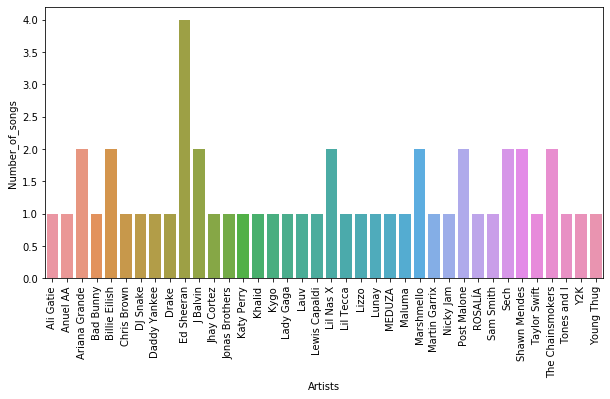

In [10]:
#as you can see the song by bad bunny is most popular. Lets combine the no. of songs and popularity
pop_and_no= pd.concat([artists,popularity],axis=1,keys=["Number_of_songs","Popularity_mean"],sort=True)

#sorting the data in descending order
print(pop_and_no.sort_values(by="Popularity_mean",ascending=False))

#graph
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.xlabel("Artists")
sns.barplot(data=pop_and_no,y="Number_of_songs",x=pop_and_no.index)

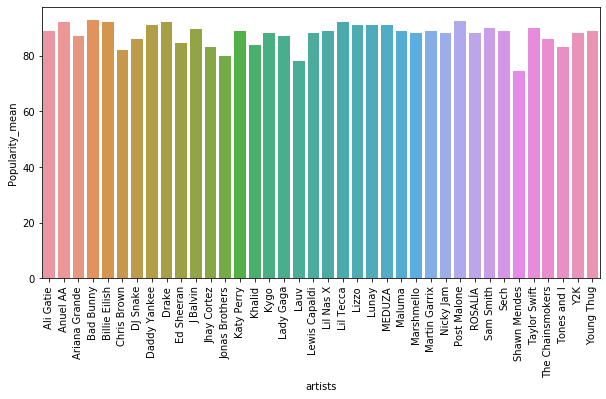

In [11]:
#popularity graph
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.xlabel("artists")
sns.barplot(data=pop_and_no,x=pop_and_no.index,y="Popularity_mean")

In [12]:
#results from the above analysis
# 1 artist: 4 songs
# 9 artists: 2 songs
# 28 artists: 1 song
# most no. of songs : Ed Sheeran
# most popular track's artist: Bad bunny
# most popular song: Callaita 

dance pop           8
pop                 7
latin               5
canadian hip hop    3
edm                 3
panamanian pop      2
reggaeton flow      2
electropop          2
reggaeton           2
country rap         2
brostep             2
canadian pop        2
dfw rap             2
big room            1
trap music          1
r&b en espanol      1
australian pop      1
escape room         1
pop house           1
atl hip hop         1
boy band            1
Name: Genre, dtype: int64


Text(0.5, 0, 'Genre')

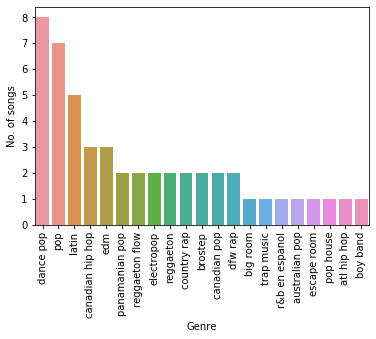

In [13]:
#Genre analysis
genres=data['Genre'].value_counts()
print(genres)

sns.barplot(x=genres.index,y=genres)
plt.ylabel("No. of songs")
plt.xticks(rotation=90)
plt.xlabel("Genre")

In [33]:
types_of_pop=data[data['Genre'].str.contains("pop")]['Genre'].unique()
pop_songs=data[data["Genre"].isin(types_of_pop)]
print("no.of pop songs: ",len(pop_songs))

no.of pop songs:  23


In [ ]:
#from genre analysis it can be concluded that
#Dance pop has the highest no. of songs in top 50
#there are total 23 pop songs including all types
#latin is also famous in top 50 with 5 songs

In [68]:
#grouping artists by their genre
type_and_artist=data.groupby(["Genre","Artist.Name"])
type_and_artist.first()

Track.Name  \
Genre            Artist.Name                                                           
atl hip hop      Young Thug                The London (feat. J. Cole & Travis Scott)   
australian pop   Tones and I                                            Dance Monkey   
big room         Martin Garrix     Summer Days (feat. Macklemore & Patrick Stump ...   
boy band         Jonas Brothers                                               Sucker   
brostep          Marshmello                                          One Thing Right   
canadian hip hop Ali Gatie                                                  It's You   
                 Drake                      Money In The Grave (Drake ft. Rick Ross)   
                 Y2K                                                          Lalala   
canadian pop     Shawn Mendes                                               Señorita   
country rap      Lil Nas X                                     Old Town Road - Remix   
dance pop        Ariana Grande                         boyfriend (with Social House)   
                 Chris Brown                               No Guidance (feat. Drake)   
                 DJ Snake                      Loco Contigo (feat. J. Balvin & Tyga)   
                 Katy Perry                                        Never Really Over   
                 Lady Gaga                                                   Shallow   
                 Lauv              fuck, i'm lonely (with Anne-Marie) - from 13 ...   
                 Taylor Swift                                  You Need To Calm Down   
dfw rap          Post Malone                             Goodbyes (Feat. Young Thug)   
edm              Kygo                                                    Higher Love   
                 The Chainsmokers                                           Takeaway   
electropop       Billie Eilish                                               bad guy   
escape room      Lizzo                                                   Truth Hurts   
latin            Daddy Yankee                                              Con Calma   
                 J Balvin                                                 LA CANCIÓN   
                 Lunay                                               Soltera - Remix   
                 Nicky Jam                                                 Te Robaré   
panamanian pop   Sech                                             Otro Trago - Remix   
pop              Ed Sheeran                          Beautiful People (feat. Khalid)   
                 Khalid                                                         Talk   
                 Lewis Capaldi                                     Someone You Loved   
                 Sam Smith                                         How Do You Sleep?   
pop house        MEDUZA                                          Piece Of Your Heart   
r&b en espanol   ROSALÍA                                                  Con Altura   
reggaeton        Bad Bunny                                                  Callaita   
                 Maluma                                            0.958333333333333   
reggaeton flow   Anuel AA                                                      China   
                 Jhay Cortez                                    No Me Conoce - Remix   
trap music       Lil Tecca                                                    Ransom   

                                   Beats.Per.Minute  Energy  Danceability  \
Genre            Artist.Name                                                
atl hip hop      Young Thug                      98      59            80   
australian pop   Tones and I                     98      59            82   
big room         Martin Garrix                  114      72            66   
boy band         Jonas Brothers                 138      73            84   
brostep          Marshmello                      88      62            66   
canadian hip h

mean of beat.per.minute: 120.06

correlation:
                  Speechiness.  Beats.Per.Minute
Speechiness.          1.000000          0.557052
Beats.Per.Minute      0.557052          1.000000


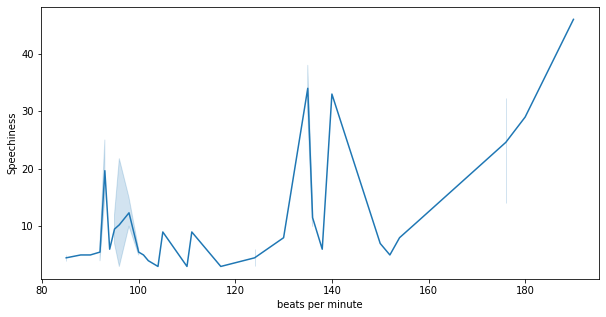

Text(0, 0.5, 'Beats average per genre')

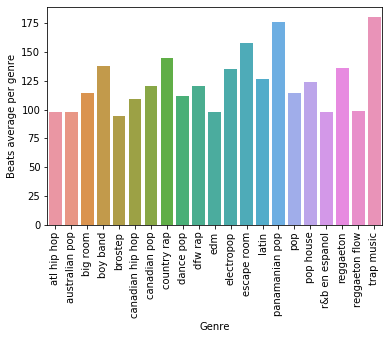

In [94]:
#beats analysis
#average beat.per.minute
avg_beat=data['Beats.Per.Minute'].mean()
print("mean of beat.per.minute:",avg_beat)

#correlating beats and speechiness visually
cor=data[["Speechiness.","Beats.Per.Minute"]].corr()
print("\ncorrelation:")
print(cor)

plt.figure(figsize=(10,5))
sns.lineplot(data=data,x="Beats.Per.Minute",y="Speechiness.")
plt.xlabel("beats per minute")
plt.ylabel("Speechiness")
plt.show()

#genre and their beats level
genre_beat=data.groupby("Genre")["Beats.Per.Minute"].mean()
sns.barplot(x=genre_beat.index,y=genre_beat.values)
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("Beats average per genre")

In [127]:
#Dancebility
#most danceable song
most_danceable=data.iloc[data['Danceability'].idxmax()]
print("Most danceable => Track name:{}, Artist Name: {}".format(most_danceable["Track.Name"],most_danceable["Artist.Name"]))

dance_genre=data.groupby("Genre")['Danceability'].mean().sort_values(ascending=False)
print("Most danceable genre: {}, Least danceable genre: {}".format(dance_genre.index[0],dance_genre.index[-1]))

Most danceable => Track name:Talk, Artist Name: Khalid
Most danceable genre: r&b en espanol, Least danceable genre: edm


In [131]:
#length analysis
print("Most lengthy song:",data.iloc[data["Length."].idxmax()])

data.corr()["Length."]
#length does not correlate well with other features



Most lengthy song: Track.Name          No Me Conoce - Remix
Artist.Name                  Jhay Cortez
Genre                     reggaeton flow
Beats.Per.Minute                      92
Energy                                79
Danceability                          81
Loudness..dB..                        -4
Liveness                               9
Valence.                              58
Length.                              309
Acousticness..                        14
Speechiness.                           7
Popularity                            83
Name: 22, dtype: object


Beats.Per.Minute   -0.139288
Energy              0.224677
Danceability       -0.000185
Loudness..dB..      0.219219
Liveness            0.131782
Valence.           -0.017782
Length.             1.000000
Acousticness..     -0.076293
Speechiness.        0.046755
Popularity         -0.087639
Name: Length., dtype: float64

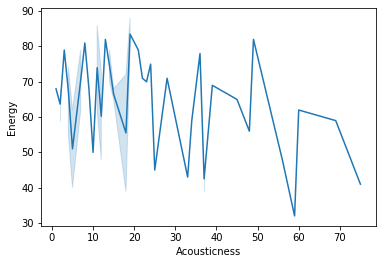

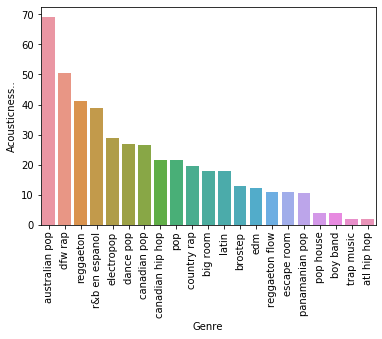

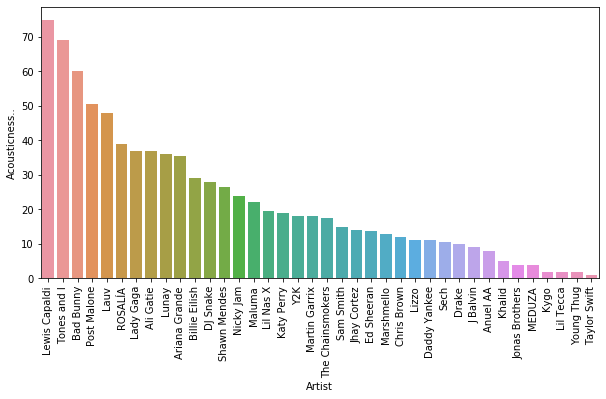

In [141]:
#acoustic analysis
data.corr()["Acousticness.."]

#the only feature related to acousticness is energy
sns.lineplot(x="Acousticness..",y="Energy",data=data)
plt.xlabel("Acousticness")
plt.ylabel("Energy")
plt.show()
#not linearly related very well

#genre and acousticness
genre_acoustic=data.groupby("Genre")["Acousticness.."].mean().sort_values(ascending=False)
sns.barplot(x=genre_acoustic.index,y=genre_acoustic.values)
plt.xlabel("Genre")
plt.ylabel("Acousticness..")
plt.xticks(rotation=90)

#artist and acousticness
artist_acoustic=data.groupby("Artist.Name")["Acousticness.."].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=artist_acoustic.index,y=artist_acoustic.values)
plt.xlabel("Artist")
plt.ylabel("Acousticness..")
plt.xticks(rotation=90)
plt.show()